In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv("bank-full.csv",sep = ";")

In [3]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
# removing missing values 
bank.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# count of no of rows and columns 
bank.shape


(45211, 17)

In [6]:
list(bank.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [8]:
bank.rename(columns={'housing':'housing_loan','loan':'personal_loan','poutcome':'outcome'},inplace=True)

In [9]:
bank

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,outcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
bank.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing_loan     0
personal_loan    0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
outcome          0
y                0
dtype: int64

In [11]:
bank.drop(bank.columns[[0,3,8,10,11,12,13,14]],axis=1)

,job,marital,default,balance,housing_loan,personal_loan,day,outcome,y
0,management,married,no,2143,yes,no,5,unknown,no
1,technician,single,no,29,yes,no,5,unknown,no
2,entrepreneur,married,no,2,yes,yes,5,unknown,no
3,blue-collar,married,no,1506,yes,no,5,unknown,no
4,unknown,single,no,1,no,no,5,unknown,no
...,...,...,...,...,...,...,...,...,...
45206,technician,married,no,825,no,no,17,unknown,yes
45207,retired,divorced,no,1729,no,no,17,unknown,yes
45208,retired,married,no,5715,no,no,17,success,yes
45209,blue-collar,married,no,668,no,no,17,unknown,no


# barplot for y

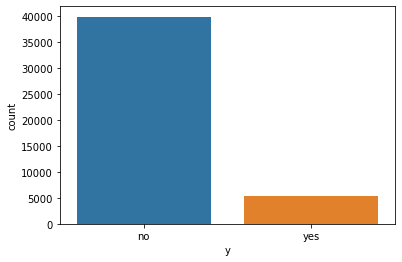

In [12]:
sn.countplot(x= "y",data=bank)

plt.show()

# countplot for job 

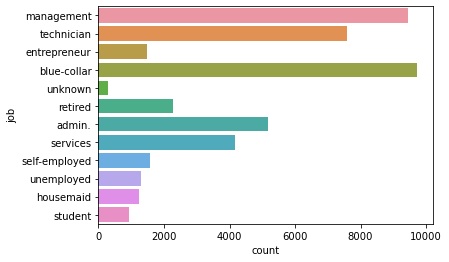

In [13]:
sn.countplot(y="job",data=bank)
plt.show()

# countplot for marital status

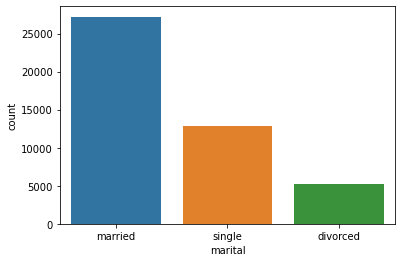

In [14]:
sn.countplot(x="marital",data=bank)
plt.show()

# count plot for credit  in default

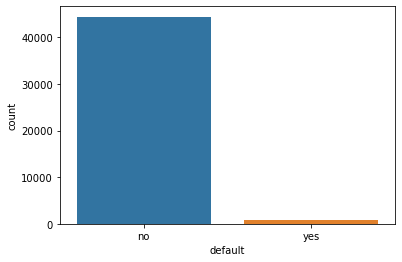

In [15]:
sn.countplot(x="default",data=bank)
plt.show()

# count plot for housing loan

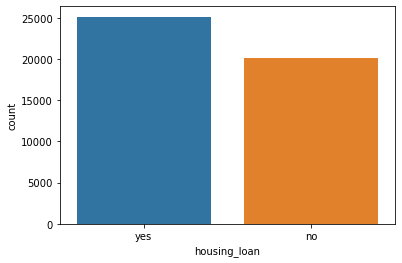

In [14]:
sn.countplot(x="housing_loan",data=bank)
plt.show()

# count plot for personal loan

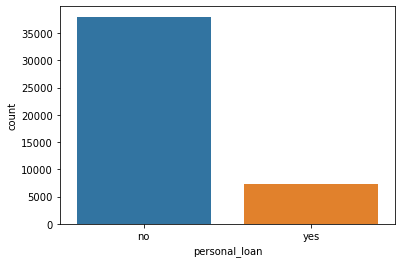

In [15]:
sn.countplot(x="personal_loan",data=bank)
plt.show()

# barplot for previous marketing outcome

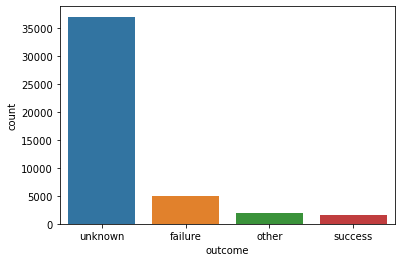

In [16]:
sn.countplot(x="outcome",data=bank)
plt.show()

In [20]:
bank1=pd.get_dummies(bank, columns=['job','marital','default','housing_loan','personal_loan','outcome'])

In [18]:
bank1

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,default_no,default_yes,housing_loan_no,housing_loan_yes,personal_loan_no,personal_loan_yes,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,58,tertiary,2143,unknown,5,may,261,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
1,44,secondary,29,unknown,5,may,151,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
2,33,secondary,2,unknown,5,may,76,1,-1,0,...,1,0,0,1,0,1,0,0,0,1
3,47,unknown,1506,unknown,5,may,92,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,unknown,1,unknown,5,may,198,1,-1,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,cellular,17,nov,977,3,-1,0,...,1,0,1,0,1,0,0,0,0,1
45207,71,primary,1729,cellular,17,nov,456,2,-1,0,...,1,0,1,0,1,0,0,0,0,1
45208,72,secondary,5715,cellular,17,nov,1127,5,184,3,...,1,0,1,0,1,0,0,0,1,0
45209,57,secondary,668,telephone,17,nov,508,4,-1,0,...,1,0,1,0,1,0,0,0,0,1


In [19]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   balance            45211 non-null  int64 
 3   contact            45211 non-null  object
 4   day                45211 non-null  int64 
 5   month              45211 non-null  object
 6   duration           45211 non-null  int64 
 7   campaign           45211 non-null  int64 
 8   pdays              45211 non-null  int64 
 9   previous           45211 non-null  int64 
 10  y                  45211 non-null  object
 11  job_admin.         45211 non-null  uint8 
 12  job_blue-collar    45211 non-null  uint8 
 13  job_entrepreneur   45211 non-null  uint8 
 14  job_housemaid      45211 non-null  uint8 
 15  job_management     45211 non-null  uint8 
 16  job_retired        45211 non-null  uint8

In [21]:
bank1.drop(bank1.columns[[12,14,16,18,21,24]],axis=1 ,inplace=True)

In [21]:
bank1

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,default_no,default_yes,housing_loan_no,housing_loan_yes,personal_loan_no,personal_loan_yes,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,58,tertiary,2143,unknown,5,may,261,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
1,44,secondary,29,unknown,5,may,151,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
2,33,secondary,2,unknown,5,may,76,1,-1,0,...,1,0,0,1,0,1,0,0,0,1
3,47,unknown,1506,unknown,5,may,92,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,unknown,1,unknown,5,may,198,1,-1,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,cellular,17,nov,977,3,-1,0,...,1,0,1,0,1,0,0,0,0,1
45207,71,primary,1729,cellular,17,nov,456,2,-1,0,...,1,0,1,0,1,0,0,0,0,1
45208,72,secondary,5715,cellular,17,nov,1127,5,184,3,...,1,0,1,0,1,0,0,0,1,0
45209,57,secondary,668,telephone,17,nov,508,4,-1,0,...,1,0,1,0,1,0,0,0,0,1


In [22]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   balance            45211 non-null  int64 
 3   contact            45211 non-null  object
 4   day                45211 non-null  int64 
 5   month              45211 non-null  object
 6   duration           45211 non-null  int64 
 7   campaign           45211 non-null  int64 
 8   pdays              45211 non-null  int64 
 9   previous           45211 non-null  int64 
 10  y                  45211 non-null  object
 11  job_admin.         45211 non-null  uint8 
 12  job_entrepreneur   45211 non-null  uint8 
 13  job_management     45211 non-null  uint8 
 14  job_self-employed  45211 non-null  uint8 
 15  job_student        45211 non-null  uint8 
 16  job_technician     45211 non-null  uint8

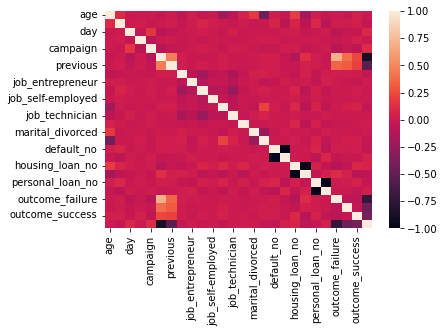

In [22]:
sn.heatmap(bank1.corr())
plt.show()

In [24]:
x=bank1.iloc[:,11:]
y=bank1.iloc[:,10]
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)


In [25]:
x_train.shape

(33908, 19)

In [26]:
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [27]:
#confusion matrix to calculate model accuracy
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9852  126]
 [1107  218]]


In [28]:
accuracy=((9852+218)/(9852+126+1107+218))

In [29]:
accuracy

0.890913916659294

In [38]:
# accuracy calculation with function 
print('Accuracy of logistic regression classifier on test set:{:2f}'.format(classifier.score(x_test,y_test)*100))

Accuracy of logistic regression classifier on test set:89.091392
